<h1 align="center"><font size="5">Medical Insurance Cost with Regression</font></h1>
<h2 align="center"><font size="3">Tiange (Alex) Cui</font></h1>

## Instructions:

In this Assignment, you will demonstrate the data regression skills you have learned by completing this course. You are expected to leverage a wide variety of tools, but also this report should focus on present findings, insights, and next steps. You may include some visuals from your code output, but this report is intended as a summary of your findings, not as a code review. 

The grading will center around 5 main points:

1. Does the report include a section describing the data?
2. Does the report include a paragraph detailing the main objective(s) of this analysis? 
3. Does the report include a section with variations of linear regression models and specifies which one is the model that best suits the main objective(s) of this analysis.
4. Does the report include a clear and well-presented section with key findings related to the main objective(s) of the analysis?
5. Does the report highlight possible flaws in the model and a plan of action to revisit this analysis with additional data or different predictive modeling techniques? 




## The Dataset

The Medical Insurance Dataset is from [Kaggle](https://www.kaggle.com/datasets/mirichoi0218/insurance)

Many factors that affect how much you pay for health insurance are not within your control. Nonetheless, it's good to have an understanding of what they are. 

Here are some factors that affect how much health insurance premiums cost, they are all included in the data:

<br>
<b>Age</b>, <b>Sex</b>, <b>BMI</b>, <b>Children</b>, <b>Smoker</b>, <b>Region</b>


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# 1. About the Data


### The data used in this analysis is a medical insurance cost dataset with several factors that may influence the insurance charges.
- age: age of primary beneficiary

- sex: insurance contractor gender, female, male

- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

- children: Number of children covered by health insurance / Number of dependents

- smoker: Smoking

- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
data.dtypes.value_counts()

object     3
int64      2
float64    2
Name: count, dtype: int64

In [7]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### There are no missing values. The data has 3 categorical columns and 4 numerical columns.

#### The `charges` will be the target variable, so first check the distribution of the charges.

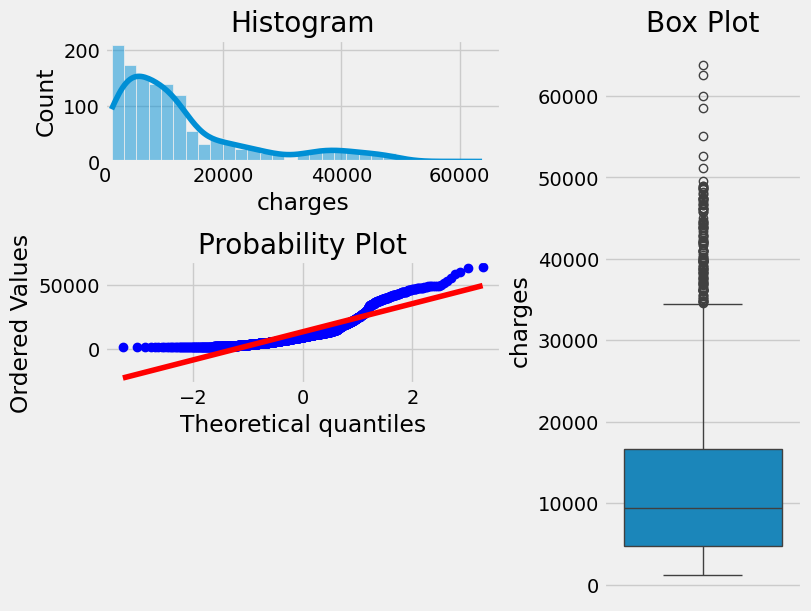

In [8]:
def plotting_3_chart(data, feature):
    ## Importing seaborn, matplotlab and scipy modules. 
    import seaborn as sns
    import matplotlib.pyplot as plt
    import matplotlib.gridspec as gridspec
    from scipy import stats
    import matplotlib.style as style
    style.use('fivethirtyeight')
    

    ## Creating a customized chart. and giving in figsize and everything. 
    fig = plt.figure(constrained_layout=True, figsize=(8,6))
    ## creating a grid of 3 cols and 3 rows. 
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    #gs = fig3.add_gridspec(3, 3)

    ## Customizing the histogram grid. 
    ax1 = fig.add_subplot(grid[0, :2])
    ## Set the title. 
    ax1.set_title('Histogram')
    ## plot the histogram
    # `distplot` is deprecate
    # sns.distplot(data.loc[:,feature], norm_hist=True, ax = ax1)
    #
    sns.histplot(data=data, x=feature, kde=True, ax=ax1)
    ax1.set_xlim(left=0)
    # or add zero padding to the data to ensure KDE starts at 0, but there has
    # some issues, the histogram doesn't seem right.
    # extended_data = np.concatenate(([0], data[feature].values))
    # Plot the histogram using sns.histplot
    # sns.histplot(data=extended_data, kde=True, ax=ax1)
    

    # customizing the QQ_plot. 
    ax2 = fig.add_subplot(grid[1, :2])
    ## Set the title. 
    ax2.set_title('QQ_plot')
    ## Plotting the QQ_Plot. 
    stats.probplot(data.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title. 
    ax3.set_title('Box Plot')
    ## Plotting the box plot. 
    sns.boxplot(data.loc[:,feature], orient='v', ax = ax3);
    
plotting_3_chart(data, 'charges')

### The target variable `charges` is not normally distributed and right-skewed, there are outliers in the variable. So a log transformation is needed.

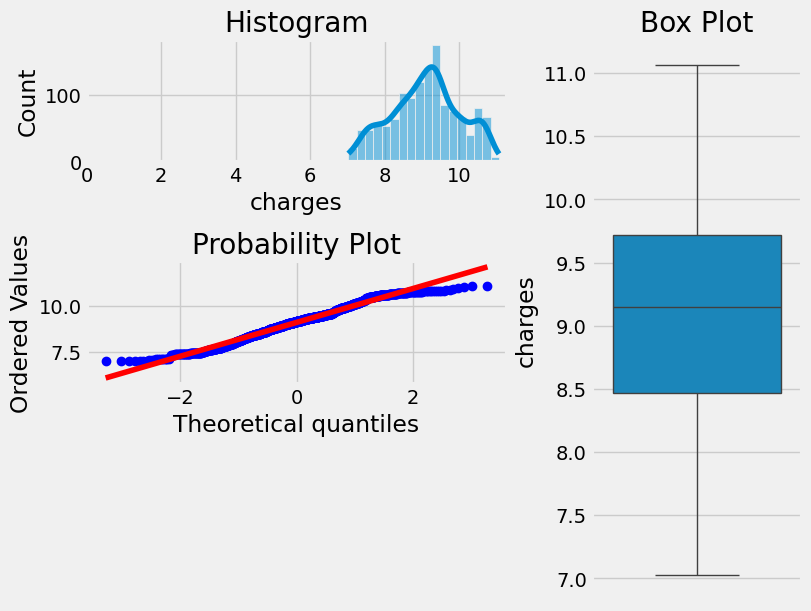

In [9]:
data['charges'] = np.log(data['charges'])
plotting_3_chart(data, 'charges')

# 2. Objectives


###  The goal is to build a insurance cost predictor with linear regression models that can predict a patient's medical insurance cost based on the key factors.

### Three linear regression models will be tested: Linear Regression, Ridge Regression (L2 Regularization), and LASSO Regression (L1 Regularization).


# 3. Linear Regression Models


### Check Linearity Assumption

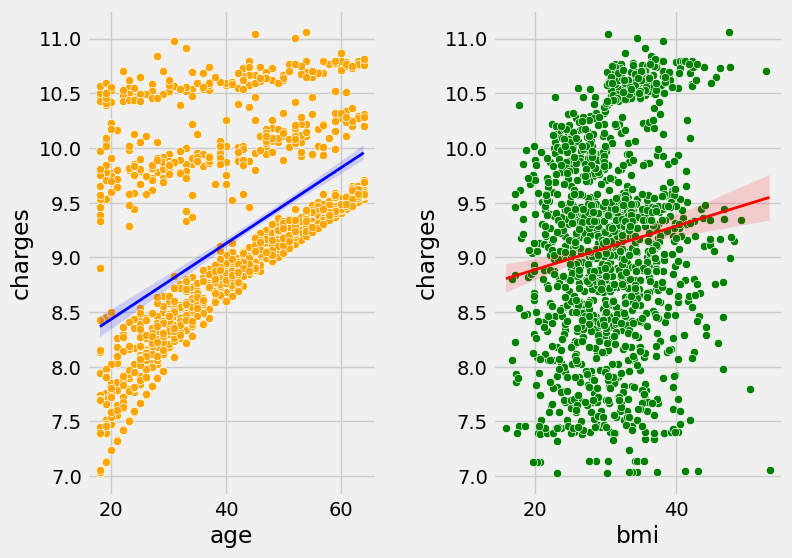

In [10]:
fig, (ax1, ax2) = plt.subplots(figsize = (8,6), ncols=2, sharey=False)
sns.scatterplot(x = data.age, y = data.charges, ax=ax1, color="orange")
sns.regplot(x=data.age, y=data.charges, ax=ax1, scatter=False, color="blue", line_kws={"linewidth": 2})
 
sns.scatterplot(x = data.bmi, y = data.charges, ax=ax2, color="green")
sns.regplot(x=data.bmi, y=data.charges, ax=ax2, scatter=False, color="red", line_kws={"linewidth": 2})

plt.subplots_adjust(wspace=0.4)

### There seemly a correlations between Age vs charges, but not so much for BMI vs charges.

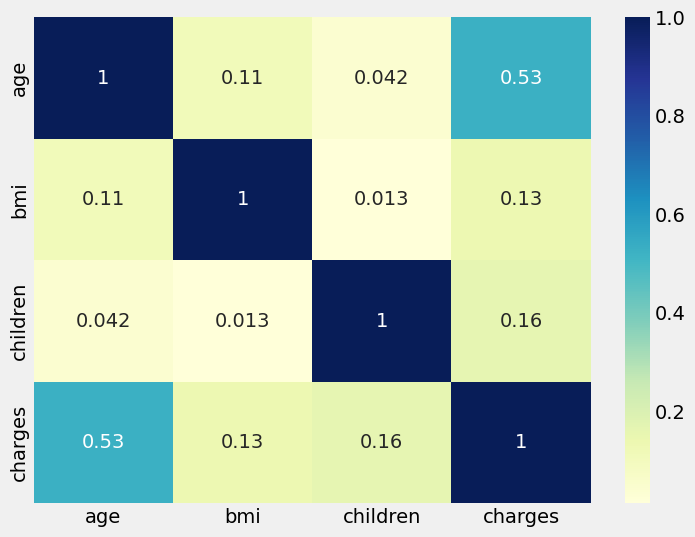

In [11]:
num = data.select_dtypes(include = ['int64', 'float64'])
plt.figure(figsize = (8, 6))
sns.heatmap(num.corr(), annot = True, cmap="YlGnBu")
plt.show()

### The correlation between Age and charges is confirmed by the heatmap as well.

In [12]:
categorical_columns = [col for col in data.columns if data[col].dtype == 'O']
numeric_columns=list(set(data.columns)-set(categorical_columns))
print(categorical_columns)
print(numeric_columns)

['sex', 'smoker', 'region']
['age', 'bmi', 'charges', 'children']


### Define input features and target variable

In [13]:
X = data.drop("charges", axis=1)
y = data["charges"].copy()

### 1> Linear Regression

### Transform categorical variables with One Hot Encoding

In [14]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


one_hot = ColumnTransformer(transformers=[("one_hot", OneHotEncoder(drop="first"), categorical_columns) ],remainder="passthrough")
X = one_hot.fit_transform(X)

names=one_hot.get_feature_names_out()
names

array(['one_hot__sex_male', 'one_hot__smoker_yes',
       'one_hot__region_northwest', 'one_hot__region_southeast',
       'one_hot__region_southwest', 'remainder__age', 'remainder__bmi',
       'remainder__children'], dtype=object)

In [15]:
colunm_names=[name[name.find("__")+2:] for name in names]
df=pd.DataFrame(data=X, columns=colunm_names)
df.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,age,bmi,children
0,0.0,1.0,0.0,0.0,1.0,19.0,27.900,0.0
1,1.0,0.0,0.0,1.0,0.0,18.0,33.770,1.0
2,1.0,0.0,0.0,1.0,0.0,28.0,33.000,3.0
3,1.0,0.0,1.0,0.0,0.0,33.0,22.705,0.0
4,1.0,0.0,1.0,0.0,0.0,32.0,28.880,0.0


### Split the Training and Testing data

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=123)

### Standardize the data

In [17]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

### Fit Linear Regression

In [18]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

### Make Predictions and Evaluate the model performence

In [19]:
from sklearn.metrics import r2_score, mean_squared_error

y_pred = lr.predict(X_test)

lr_mse = mean_squared_error(y_test, y_pred)
lr_r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {lr_mse}")
print(f"R^2 Score: {lr_r2}")

Mean Squared Error: 0.149622286385491
R^2 Score: 0.8098535893654983


### 2>. Ridge Regression

### Use Cross-Validation to find optimal alpha for Ridge Regression model

In [20]:
from sklearn.linear_model import Ridge, RidgeCV

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=123)

X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

ridge_cv = RidgeCV(alphas=[0.01, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0], cv=5)
ridge_cv.fit(X_train, y_train)
print("Optimal alpha for Ridge:", ridge_cv.alpha_)


Optimal alpha for Ridge: 5.0


### Apply the optimal alpha value to the Ridge Regression model

In [21]:
ridge = Ridge(alpha=5)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)
print(f"Mean Squared Error: {ridge_mse}")
print(f"R^2 Score: {ridge_r2}")

Mean Squared Error: 0.14973706034903922
R^2 Score: 0.8097077296962591


### 3>. LASSO regression

### Use Cross-Validation to find optimal alpha for LASSO Regression model

In [22]:
from sklearn.linear_model import Lasso, LassoCV

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=123)

X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

lasso_cv = LassoCV(alphas=[0.01, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0], cv=5)
lasso_cv.fit(X_train, y_train)
print("Optimal alpha for LASSO:", lasso_cv.alpha_)

Optimal alpha for LASSO: 0.01


### Apply the optimal alpha value to the LASSO Regression model

In [23]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)
print(f"Mean Squared Error: {lasso_mse}")
print(f"R^2 Score: {lasso_r2}")

Mean Squared Error: 0.14928041414092968
R^2 Score: 0.8102880552580419


### Compile and compare model performance metrics

In [24]:
rmse_vals = [np.sqrt(lr_mse), np.sqrt(ridge_mse), np.sqrt(lasso_mse)]
r2_vals = [lr_r2, ridge_r2, lasso_r2]

labels = ['Linear', 'Ridge', 'Lasso']

eval_df = pd.Series(rmse_vals, index=labels).to_frame()
eval_df.rename(columns={0: 'RMSE'}, inplace=1)
eval_df["R2"] = pd.Series(r2_vals, index=labels)
eval_df

,RMSE,R2
Linear,0.386810,0.809854
Ridge,0.386959,0.809708
Lasso,0.386368,0.810288


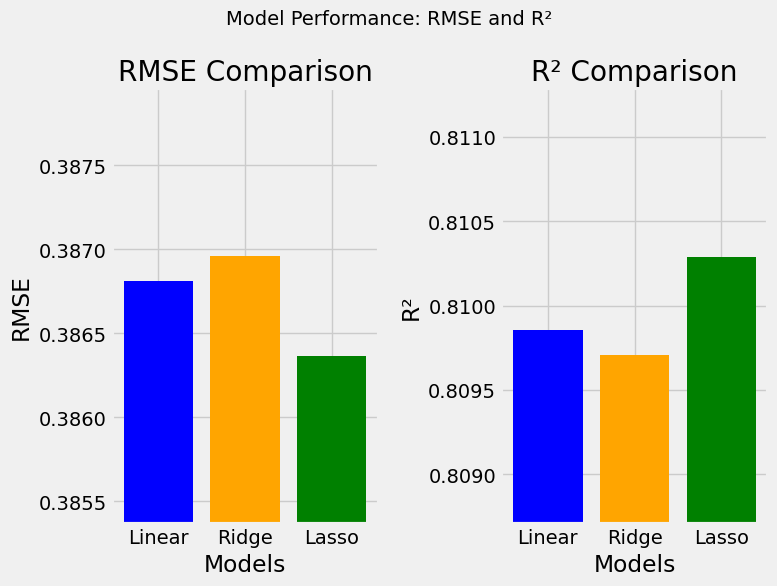

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 6))

# RMSE bar plot
ax1.bar(eval_df.index.tolist(), eval_df.RMSE.tolist(), color=['blue', 'orange', 'green'])
ax1.set_title("RMSE Comparison")
ax1.set_ylabel("RMSE")
ax1.set_xlabel("Models")
ax1.set_ylim(min(eval_df.RMSE.tolist()) - 0.001, max(eval_df.RMSE.tolist()) + 0.001)

# R² bar plot
ax2.bar(eval_df.index.tolist(), eval_df.R2.tolist(), color=['blue', 'orange', 'green'])
ax2.set_title("R² Comparison")
ax2.set_ylabel("R²")
ax2.set_xlabel("Models")
ax2.set_ylim(min(eval_df.R2.tolist()) - 0.001, max(eval_df.R2.tolist()) + 0.001)

# Adjust layout and show the plot
fig.suptitle("Model Performance: RMSE and R²", fontsize=14)
plt.tight_layout()
plt.show()

### LASSO model performs the best with the lowest RMSE and highest R² score

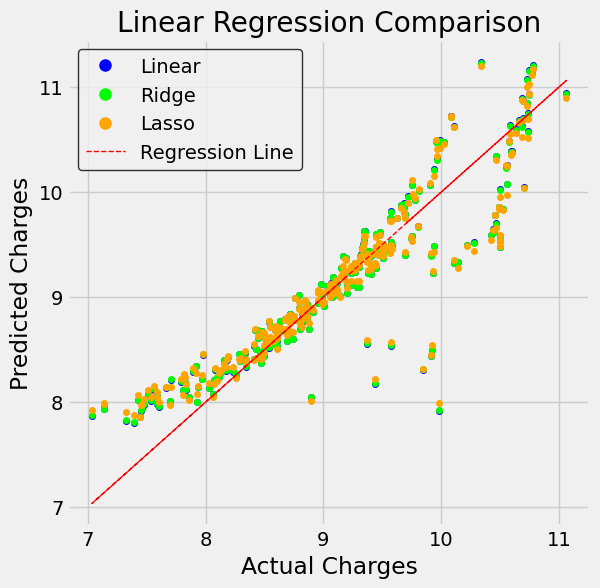

In [26]:

fig = plt.figure(figsize=(6,6))
ax = plt.axes()

labels = ['Linear', 'Ridge', 'Lasso']
models = [LinearRegression, Ridge, Lasso]
colors = ['blue', 'lime', 'orange']

# Define parameters for models
param_dict = {"Ridge": {"alpha": 5}, "Lasso": {"alpha": 0.01}}

for mod, lab, color in zip(models, labels, colors):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=123)

    # Scale the data
    X_train = ss.fit_transform(X_train)
    X_test = ss.transform(X_test)

    # Get model-specific parameters
    params = param_dict.get(lab, {})

    # Fit the model with parameters
    model = mod(**params)  # Pass parameters as kwargs
    model.fit(X_train, y_train)

    # Plot predictions vs actual values
    ax.plot(y_test, model.predict(X_test), marker='o', ls='', ms=4, label=lab, color=color)

# Add the regression line (predicted vs actual)
ax.plot(y_test, y_test, color='red', ls='--', label='Regression Line', lw=1)

# Customize legend and plot
leg = plt.legend(frameon=True, markerscale=2)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(1.0)

ax.set(xlabel='Actual Charges', 
       ylabel='Predicted Charges', 
       title='Linear Regression Comparison')

plt.show()


# 4. Insights and key findings


### Check the correlation between categorical variables and the target variable

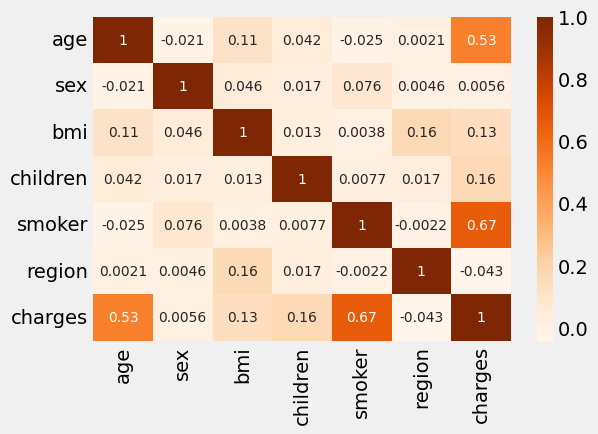

In [27]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
label.fit(data.sex.drop_duplicates())
data.sex = label.transform(data.sex)
label.fit(data.smoker.drop_duplicates())
data.smoker = label.transform(data.smoker)
label.fit(data.region.drop_duplicates())
data.region = label.transform(data.region)

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax = sns.heatmap(data.corr(), annot=True, cmap='Oranges', annot_kws={'size': 10})

### Smoking status has strong a correlation to the charges. It has even higher correlation than Age. 

### Based on the three models, it seems LASSO regression performs the best, it has the lowest RMSE of 0.386368 and the highest R² score
### Smoking status seems to be a key factor when determines the insurance cost, Age is also an important factor.

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
